In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monkeypox-skin-lesion-dataset/Monkeypox_Dataset_metadata.csv
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M34_02_07.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M53_01_02.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M50_03_04.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M34_04_07.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M34_01_09.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M34_03_13.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_02_10.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M50_03_06.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_13.jpg
/kaggle/input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M34_02_10.jpg
/kaggle/input/monkeypox-s

In [2]:
import tensorflow as tf
from tqdm import tqdm 

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory
mode='categorical'
img_height=224
img_width=224

train_ds=image_dataset_from_directory('../input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Train',label_mode=mode,seed=1337,image_size=(img_height,img_width))

val_ds=image_dataset_from_directory('../input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Val',label_mode=mode,
                                      seed=1337,image_size=(img_height,img_width))

test_ds=image_dataset_from_directory('../input/monkeypox-skin-lesion-dataset/Fold1/Fold1/Fold1/Test',label_mode=mode,seed=1337,image_size=(img_height,img_width))



Found 2142 files belonging to 2 classes.


2022-11-11 05:03:17.745537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 05:03:17.837593: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 05:03:17.838491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 05:03:17.841923: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 420 files belonging to 2 classes.
Found 45 files belonging to 2 classes.


In [4]:
class_names=train_ds.class_names

2022-11-11 05:03:20.925704: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


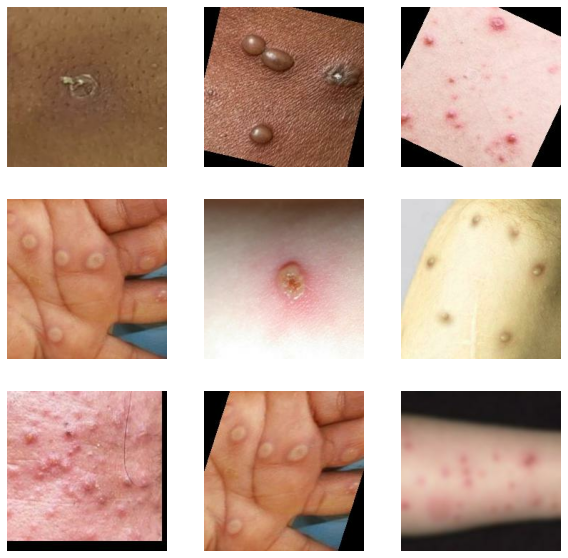

In [5]:
# Lets take a peak what's inside
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

https://keras.io/guides/transfer_learning/
https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

In [6]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow import keras
# seq,adam,resnset
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50,InceptionV3


In [7]:
model=Sequential()
pretrainedModel=InceptionV3(include_top=False,input_shape=(224,224,3),pooling='avg',classes=2)
for layer in pretrainedModel.layers:
    layer.trainable=False
    
model.add(pretrainedModel)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))   
model.summary()
# experiment with number of neurons

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 22,852,898
Trainable params: 1,050,114
Non-trainable params: 21,802,784
_________________________________________________________________


In [8]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.BinaryCrossentropy(),metrics=[keras.metrics.BinaryAccuracy()])
model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10


2022-11-11 05:03:31.213469: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


67/67 [==============================] - 20s 138ms/step - loss: 7.2309 - binary_accuracy: 0.6190 - val_loss: 1.6418 - val_binary_accuracy: 0.7452
Epoch 2/10
67/67 [==============================] - 5s 75ms/step - loss: 1.0259 - binary_accuracy: 0.6783 - val_loss: 1.6899 - val_binary_accuracy: 0.7429
Epoch 3/10
67/67 [==============================] - 5s 74ms/step - loss: 1.1845 - binary_accuracy: 0.6849 - val_loss: 1.1898 - val_binary_accuracy: 0.6429
Epoch 4/10
67/67 [==============================] - 6s 82ms/step - loss: 0.7696 - binary_accuracy: 0.7470 - val_loss: 1.5633 - val_binary_accuracy: 0.4738
Epoch 5/10
67/67 [==============================] - 5s 75ms/step - loss: 0.8756 - binary_accuracy: 0.7176 - val_loss: 1.1605 - val_binary_accuracy: 0.6476
Epoch 6/10
67/67 [==============================] - 5s 71ms/step - loss: 0.6203 - binary_accuracy: 0.7507 - val_loss: 2.3509 - val_binary_accuracy: 0.6857
Epoch 7/10
67/67 [==============================] - 5s 74ms/step - loss: 0.9227

In [9]:

labels = []
predictions = []

for X, y in tqdm(test_ds):
    for i in range(len(X)):
        result = model(np.expand_dims(X[i], axis=0))

        predictions.append(class_names[np.argmax(result)] == "Monkeypox")
        labels.append(test_ds.class_names[np.argmax(y[i])] == "Monkeypox")



100%|██████████| 2/2 [00:03<00:00,  1.90s/it]


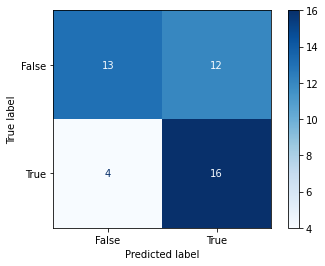

In [10]:


from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(labels, predictions, cmap='Blues')
plt.show()



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(labels, predictions))
print('Precision score : ', precision_score(labels, predictions, average='weighted'))
print('Recall score : ', recall_score(labels, predictions, average='weighted'))
print('F1 score : ', f1_score(labels, predictions, average='weighted'))

Accuracy score :  0.6444444444444445
Precision score :  0.6788048552754434
Recall score :  0.6444444444444445
F1 score :  0.6402116402116402


In [12]:


from sklearn.metrics import classification_report

print(classification_report(labels, predictions))



              precision    recall  f1-score   support

       False       0.76      0.52      0.62        25
        True       0.57      0.80      0.67        20

    accuracy                           0.64        45
   macro avg       0.67      0.66      0.64        45
weighted avg       0.68      0.64      0.64        45



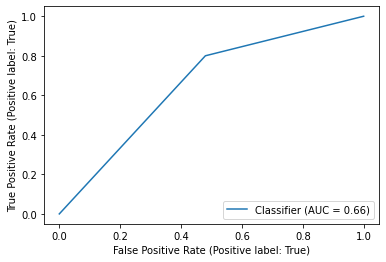

In [13]:


from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(labels, predictions, pos_label=True)
plt.show()



In [14]:
model.save('inceptionv3_1.h5')